In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import NearestNeighbors
import seaborn as sns

# Scatter Plot of first two PCA components

In [2]:
def scatter_plot_pca(df, n):
    fig1 = plt.figure(figsize=(20,20))
    plt.scatter(df['pca_one'][:n], df['pca_two'][:n], color=['orange', 'cyan', 'brown'], cmap='viridis')

    for m, p1, p2 in zip(df['INSTNM'][:n], df['pca_one'][:n], df['pca_two'][:n]):
        plt.text(p1, p2, s=m, color=np.random.rand(3)*0.7)

    plt.show()
    fig1.savefig('scatter.png', dpi=100)

In [3]:
df = pd.read_csv("cleaned_data.csv")

In [4]:
cols_rem = ['OPEID','INSTNM', 'STABBR', 'CITY', 'ZIP']
cols = [x for x in df.columns if x not in cols_rem]

### Standardizing Data

In [5]:
sc = StandardScaler()
temp = sc.fit_transform(df[cols])
df[cols] = temp
df.head()

,OPEID,UNITID,INSTNM,CITY,STABBR,ZIP,MAIN,HIGHDEG,CONTROL,RELAFFIL,...,PCIP51,PCIP52,PCIP54,MD_EARN_WNE_P6,MD_EARN_WNE_P10,CRIME_COUNT,SPRING_TAVG,SUMMER_TAVG,FALL_TAVG,WINTER_TAVG
0,100200,-1.170236,Alabama A & M University,Normal,AL,35762,0.347634,0.475928,-1.359716,-0.667281,...,-0.613153,-0.188115,-0.752060,-0.486782,-0.399231,-0.224025,0.756109,0.449189,0.334652,0.577070
1,105200,-1.170148,University of Alabama at Birmingham,Birmingham,AL,35294-0110,0.347634,0.475928,-1.359716,-0.667281,...,0.396063,0.020061,0.400547,0.259245,0.169811,-0.494270,0.982777,0.572055,0.584786,0.847717
2,2503400,-1.169886,Amridge University,Montgomery,AL,36117-3553,0.347634,0.475928,0.293949,1.884598,...,-0.613153,1.255744,-0.752060,0.204491,0.164286,-0.224025,1.291126,0.825084,0.851284,1.204054
3,105500,-1.169731,University of Alabama in Huntsville,Huntsville,AL,35899,0.347634,0.475928,-1.359716,-0.667281,...,0.242712,0.156713,-0.034746,0.361910,0.468143,-0.224025,0.756109,0.449189,0.334652,0.577070
4,100500,-1.169556,Alabama State University,Montgomery,AL,36104-0271,0.347634,0.475928,-1.359716,-0.667281,...,-0.194267,-0.476538,-0.059269,-0.630512,-0.576020,-0.568588,1.291126,0.825084,0.851284,1.204054


### Applying PCA

In [6]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df[cols])
df['pca_one'] = df_pca[:, 0]
df['pca_two'] = df_pca[:, 1]
df['pca_three'] = df_pca[:, 2]

### Scatter plot of first 200 colleges

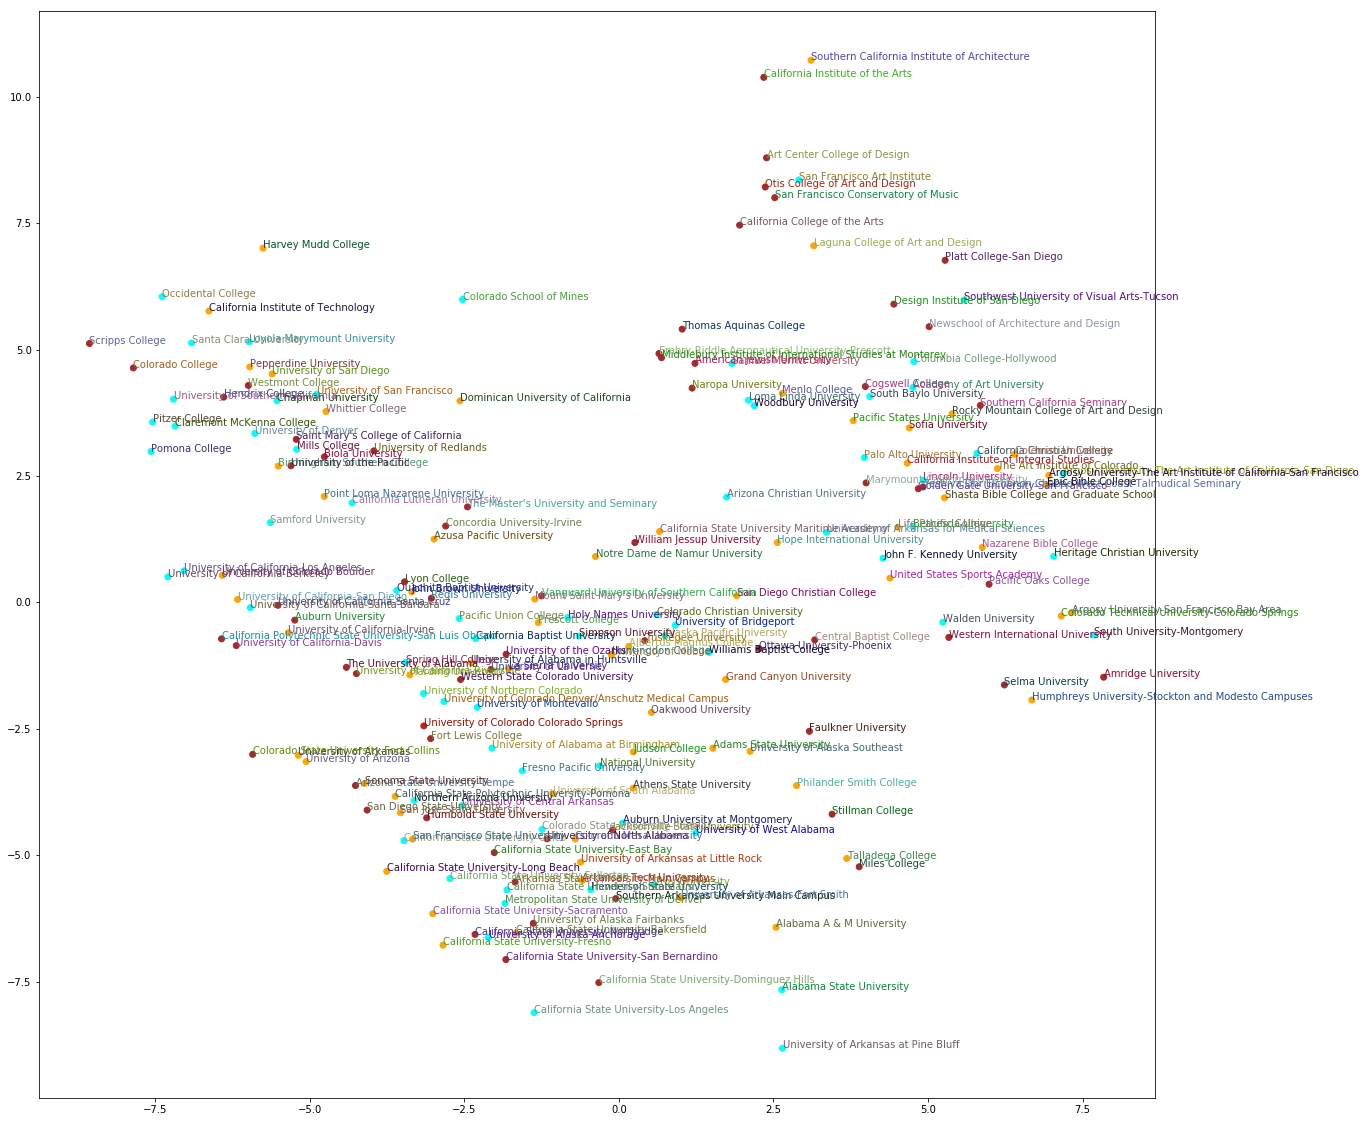

In [7]:
scatter_plot_pca(df, 200)

# Correlation Plot b/w columns

In [8]:
corr_cols = ['SAT_AVG', 'ACTCMMID', 'UGDS', 'UG25ABV', 
             'PPTUG_EF', 'PAR_ED_PCT_1STGEN', 'C150_4', 'RPY_7YR_RT', 
             'RELAFFIL', 'MD_EARN_WNE_P6', 'COSTT4_A', 'ADM_RATE', 'CRIME_COUNT' ]

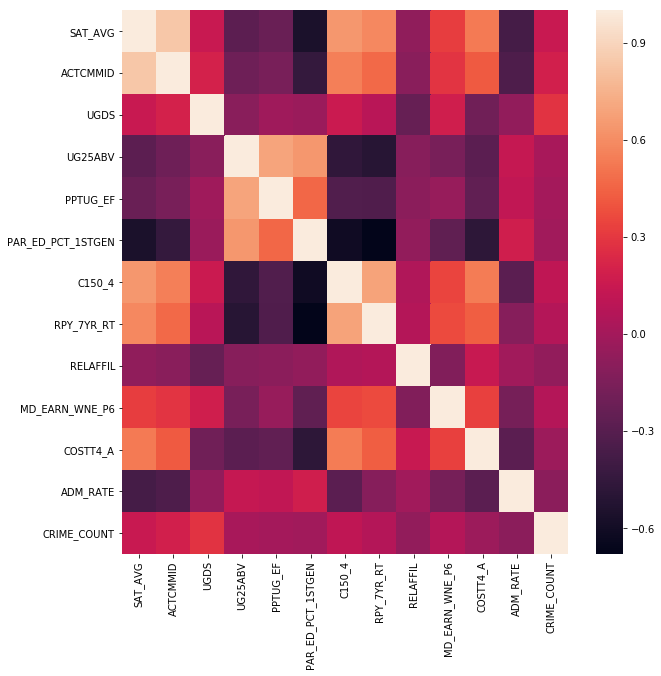

In [9]:
corr = df[corr_cols].corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, ax=ax)
plt.show()